In [2]:
from yahoo_fin.stock_info import get_data
from datetime import date
import plotly.express as px
import pandas as pd
import numpy as np
import time
from pathlib import Path
import csv
import seaborn as sns
import scipy.optimize as sco
import matplotlib.pyplot as plt
%matplotlib inline


today = date.today()
spy = get_data("spy", start_date="01/03/2016", end_date=today, index_as_date = True, interval="1d")
xle = get_data("xle", start_date="01/03/2016", end_date=today, index_as_date = True, interval="1d")
gold = get_data("GLD", start_date="01/03/2016", end_date=today, index_as_date = True, interval="1d")
tlt = get_data("tlt", start_date="01/03/2016", end_date=today, index_as_date = True, interval="1d")
usd = get_data("tlt", start_date="01/03/2016", end_date=today, index_as_date = True, interval="1d")

In [3]:
# @TODO: Set file paths for btc_data.csv and eth_data.csv
btc_filepath = Path('Resources/BTC-USD.csv')
btc_df = pd.read_csv(btc_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)

btc_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [4]:
btc_df.sort_index(inplace=True)
btc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [5]:
eth_filepath = Path('Resources/ETH-USD.csv')
eth_df = pd.read_csv(eth_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)

eth_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [6]:
#fig = px.line(spy['close'], labels={ 'close' : 'SPY CLOSE'})
#fig.show()

In [7]:
#gold.head()

In [8]:
#dxy = get_data("dxy", start_date="01/03/2015", end_date=today, index_as_date = True, interval="1d")
#dxy['close'].plot(figsize=(20,10))

In [9]:
column = ['BTC', 'ETH', 'SPY', 'XLE', 'GLD', 'TLT']

combined_df = pd.concat([btc_df['Close'], eth_df['Close'], spy['close'], xle['close'], gold['close'], tlt['close']], axis="columns", join="inner")
combined_df.columns = (['BTC', 'ETH', 'SPY', 'XLE', 'GLD', 'TLT'])
combined_df.head()

,BTC,ETH,SPY,XLE,GLD,TLT
2016-01-04,433.091003,0.954480,201.020004,60.299999,102.889999,121.449997
2016-01-05,431.959991,0.950176,201.360001,60.529999,103.180000,120.959999
2016-01-06,429.105011,0.950860,198.820007,58.200001,104.669998,122.589996
2016-01-07,458.048004,0.942005,194.050003,56.779999,106.150002,122.809998
2016-01-08,453.230011,0.986789,191.919998,56.049999,105.680000,123.360001


In [10]:
combined_df.isnull().sum()

BTC    5
ETH    5
SPY    0
XLE    0
GLD    0
TLT    0
dtype: int64

In [11]:
portfolio_returns  = combined_df.dropna()

In [12]:
portfolio_returns.isnull().sum()

BTC    0
ETH    0
SPY    0
XLE    0
GLD    0
TLT    0
dtype: int64

In [13]:
portfolio_returns = portfolio_returns.pct_change()

In [14]:
portfolio_returns  = portfolio_returns.dropna()

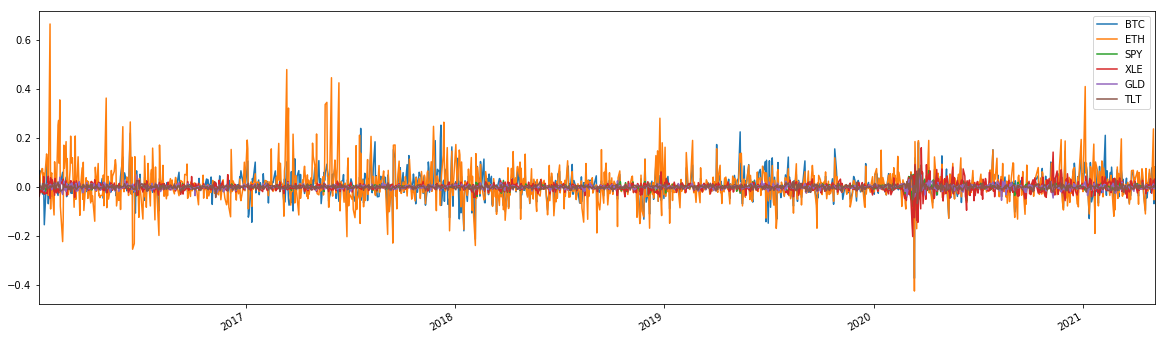

In [15]:
portfolio_returns.plot(figsize=(20,6))

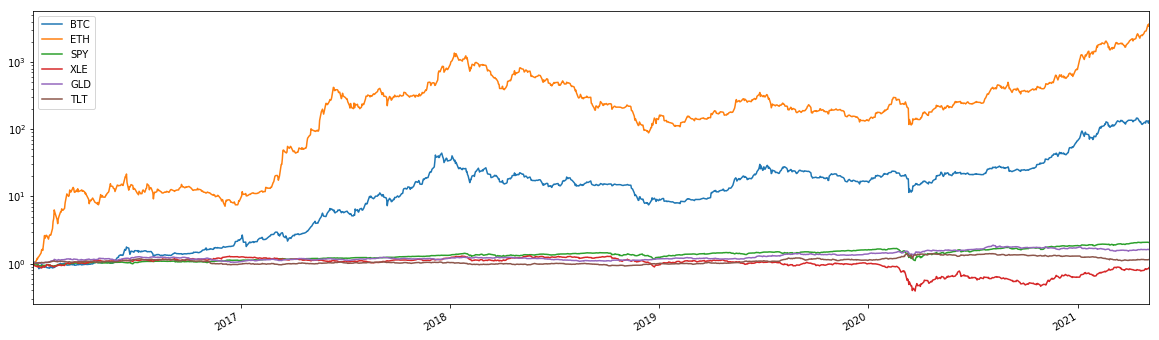

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,6),logy=True)


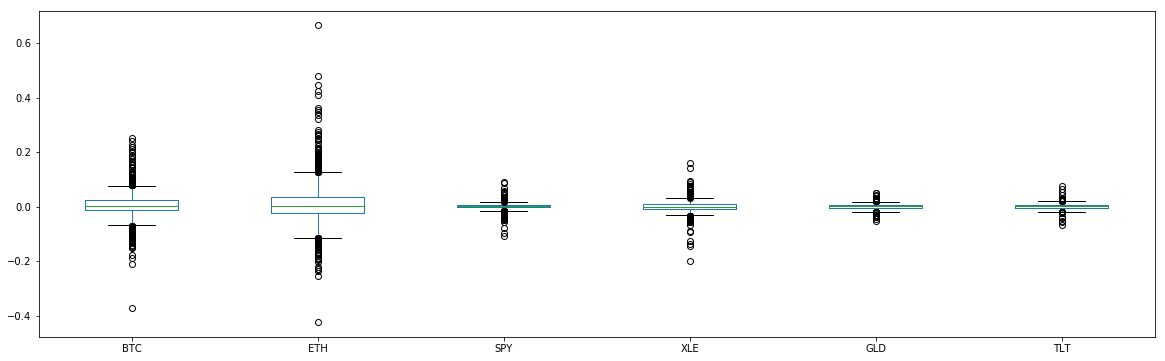

In [17]:
portfolio_returns.plot(kind='box',figsize=(20,6))

In [18]:
volatility = portfolio_returns.std()
volatility

BTC    0.047101
ETH    0.075262
SPY    0.011744
XLE    0.020553
GLD    0.008816
TLT    0.008734
dtype: float64

In [19]:
volatility = portfolio_returns.std() * np.sqrt(252)
volatility

BTC    0.747697
ETH    1.194741
SPY    0.186429
XLE    0.326274
GLD    0.139945
TLT    0.138652
dtype: float64

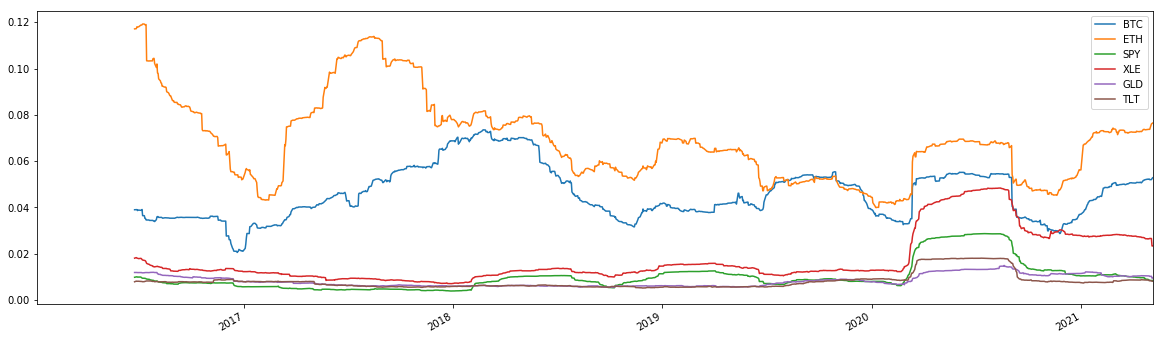

In [20]:
# Calculate the rolling standard deviation for all portfolios using a 120-day window
roll = portfolio_returns.rolling(window=120).std()
# Plot the rolling standard deviation
portfolio_returns.rolling(window=120).std().plot(figsize=(20,6))

In [21]:
# Calculate the correlation
price_correlation = portfolio_returns.corr()
# Display de correlation matrix
price_correlation

,BTC,ETH,SPY,XLE,GLD,TLT
BTC,1.000000,0.520378,0.151707,0.123605,0.114793,-0.037814
ETH,0.520378,1.000000,0.133469,0.101906,0.104227,-0.017635
SPY,0.151707,0.133469,1.000000,0.714004,-0.005551,-0.390536
XLE,0.123605,0.101906,0.714004,1.000000,-0.023311,-0.338339
GLD,0.114793,0.104227,-0.005551,-0.023311,1.000000,0.331360
TLT,-0.037814,-0.017635,-0.390536,-0.338339,0.331360,1.000000


In [22]:
# Use `ewm` to calculate the rolling window

portfolio_returns.ewm(halflife=21).mean().head()

,BTC,ETH,SPY,XLE,GLD,TLT
2016-01-05,-0.002611,-0.004509,0.001691,0.003814,0.002819,-0.004035
2016-01-06,-0.004643,-0.001852,-0.005579,-0.017689,0.008726,0.004865
2016-01-07,0.020185,-0.004421,-0.011920,-0.019999,0.010590,0.003808
2016-01-08,0.012125,0.009220,-0.011673,-0.018124,0.006648,0.003984
2016-01-11,0.007276,0.023432,-0.008970,-0.018826,0.003331,0.000798


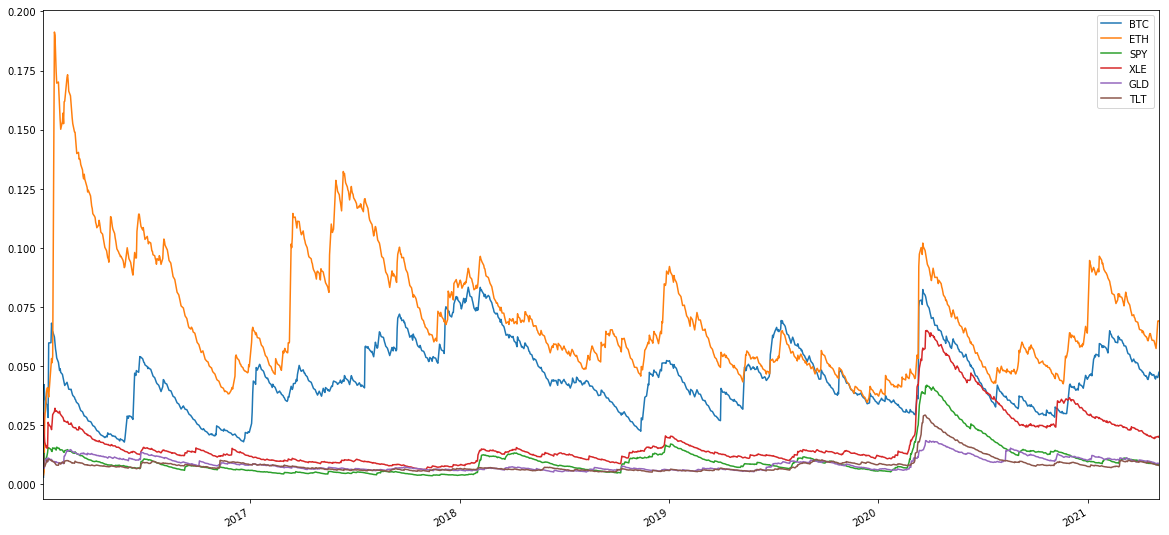

In [65]:
portfolio_returns.ewm(halflife=21).std().plot(figsize=(20, 10))

In [24]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252))
sharpe_ratios


BTC    1.607789
ETH    1.864269
SPY    0.827579
XLE    0.084144
GLD    0.723592
TLT    0.259128
dtype: float64

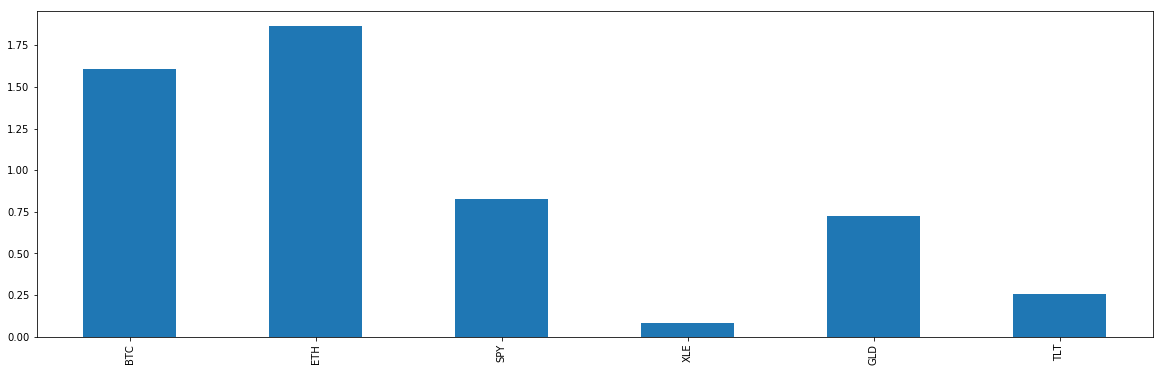

In [25]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar',figsize=(20,6))

In [26]:
# Calculate and plot the correlation
price_correlation_new = portfolio_returns.corr()
# Display de correlation matrix
price_correlation_new

,BTC,ETH,SPY,XLE,GLD,TLT
BTC,1.000000,0.520378,0.151707,0.123605,0.114793,-0.037814
ETH,0.520378,1.000000,0.133469,0.101906,0.104227,-0.017635
SPY,0.151707,0.133469,1.000000,0.714004,-0.005551,-0.390536
XLE,0.123605,0.101906,0.714004,1.000000,-0.023311,-0.338339
GLD,0.114793,0.104227,-0.005551,-0.023311,1.000000,0.331360
TLT,-0.037814,-0.017635,-0.390536,-0.338339,0.331360,1.000000


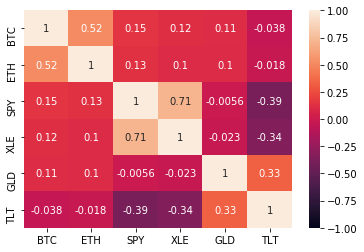

In [27]:
sns.heatmap(price_correlation_new, vmin=-1, vmax=1,annot=True)

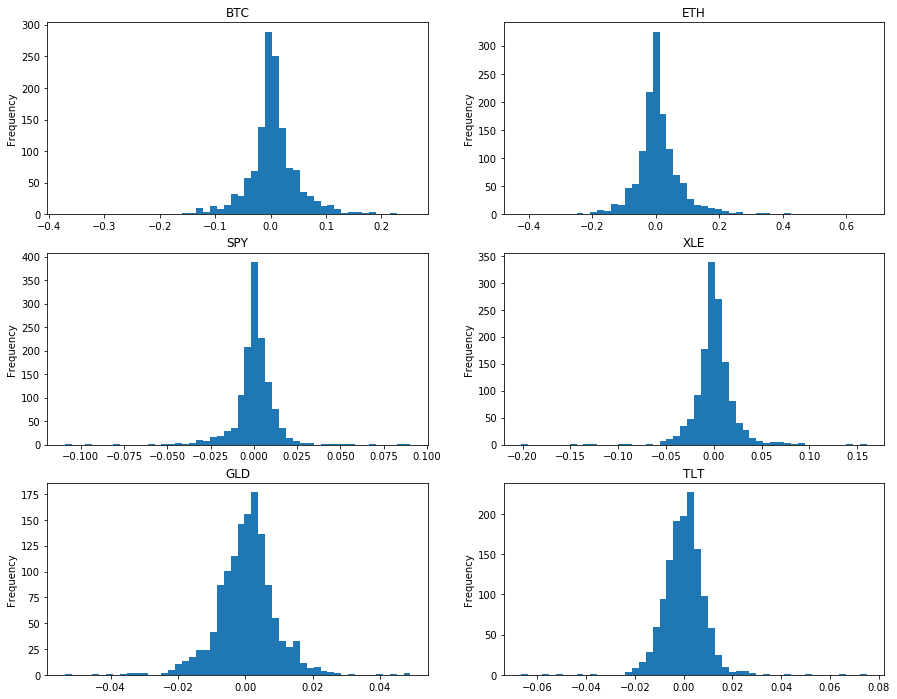

In [28]:
# Distribution Histogram


plt.subplot(3, 2, 1)
portfolio_returns['BTC'].plot.hist(bins = 50,figsize=(15,12))
plt.title('BTC')

  
plt.subplot(3, 2, 2)
portfolio_returns['ETH'].plot.hist(bins = 50)
plt.title('ETH')
  
plt.subplot(3, 2, 3)
portfolio_returns['SPY'].plot.hist(bins = 50)
plt.title('SPY')

plt.subplot(3, 2, 4)
portfolio_returns['XLE'].plot.hist(bins = 50)
plt.title('XLE')

plt.subplot(3, 2, 5)
portfolio_returns['GLD'].plot.hist(bins = 50)
plt.title('GLD')

plt.subplot(3, 2, 6)
portfolio_returns['TLT'].plot.hist(bins = 50)
plt.title('TLT')
  
plt.show()

# portfolio_returns['BTC'].plot.hist(stacked=True, bins=50)




In [29]:
# Set weights
weights = [0,0,1/4,1/4,1/4,1/4]

# Calculate portfolio return

portfolio_returns_weight= portfolio_returns.dot(weights)
# portfolio_returns_new.set_index('Date')

portfolio_returns_weight.dropna()

# Display sample data
portfolio_returns_weight.head()

2016-01-05    0.001072
2016-01-06   -0.005798
2016-01-07   -0.008114
2016-01-08   -0.005946
2016-01-11   -0.010064
dtype: float64

In [30]:
#Conavriance
portfolio_returns.cov()

,BTC,ETH,SPY,XLE,GLD,TLT
BTC,0.002218,0.001845,8.391558e-05,0.000120,4.766486e-05,-0.000016
ETH,0.001845,0.005664,1.179682e-04,0.000158,6.915274e-05,-0.000012
SPY,0.000084,0.000118,1.379193e-04,0.000172,-5.746919e-07,-0.000040
XLE,0.000120,0.000158,1.723438e-04,0.000422,-4.223850e-06,-0.000061
GLD,0.000048,0.000069,-5.746919e-07,-0.000004,7.771642e-05,0.000026
TLT,-0.000016,-0.000012,-4.005898e-05,-0.000061,2.551427e-05,0.000076


In [31]:
portfolio_returns.cov() * 252

,BTC,ETH,SPY,XLE,GLD,TLT
BTC,0.559051,0.464856,0.021147,0.030154,0.012012,-0.003920
ETH,0.464856,1.427405,0.029728,0.039724,0.017426,-0.002921
SPY,0.021147,0.029728,0.034756,0.043431,-0.000145,-0.010095
XLE,0.030154,0.039724,0.043431,0.106455,-0.001064,-0.015306
GLD,0.012012,0.017426,-0.000145,-0.001064,0.019585,0.006430
TLT,-0.003920,-0.002921,-0.010095,-0.015306,0.006430,0.019224


In [32]:
weights = np.random.dirichlet(np.ones(6), size=1)
weights = weights[0]
print(weights)

[0.0178839  0.15913036 0.00850021 0.06073664 0.0596746  0.69407428]


In [33]:
exp_port_return = np.sum(portfolio_returns.mean()*weights)*252
print(exp_port_return)

0.40989166937717975


In [34]:
port_var = np.dot(weights.T, np.dot(portfolio_returns.cov()*252, weights))
port_vol = np.sqrt(port_var)
print(port_var)
print(port_vol)

0.048390387780248074
0.2199781529612613


In [35]:

def portfolio_simulation(assets, iterations):
    returns = assets
    port_returns = []
    port_vols = []
    
    for i in range (iterations):
        weights = np.random.dirichlet(np.ones(6),size=1)
        weights = weights[0]
        port_returns.append(np.sum(returns.mean() * weights) * 252)
        port_vols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))))
    
    # Convert lists to arrays
    port_returns = np.array(port_returns)
    port_vols = np.array(port_vols)
 
    
    # Plot the distribution of portfolio returns and volatilities 
    plt.figure(figsize = (15,10))
    plt.scatter(port_vols,port_returns,c = (port_returns / port_vols), marker='o')
    plt.xlabel('Portfolio Volatility')
    plt.ylabel('Portfolio Return')
    plt.colorbar(label = 'Sharpe ratio')

    
    return port_returns, port_vols

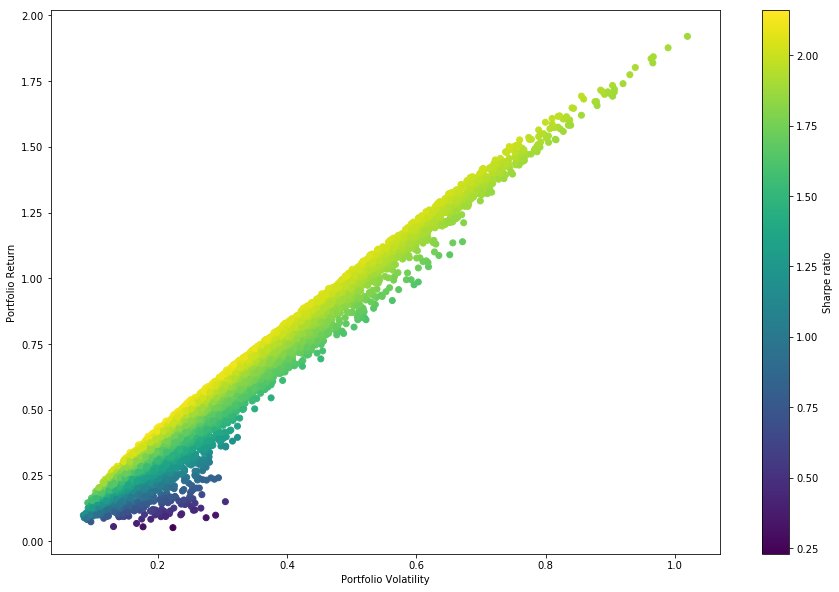

In [36]:
port_returns, port_vols = portfolio_simulation(portfolio_returns, 8000)

In [37]:
def portfolio_stats(weights, portfolio_returns):

    # Convert to array in case list was passed instead.
    weights = np.array(weights)
    port_return = np.sum(returns.mean() * weights) * 252
    port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe = port_return/port_vol

    return {'return': port_return, 'volatility': port_vol, 'sharpe': sharpe}


In [38]:
def minimize_sharpe(weights, portfolio_returns):  
    return -portfolio_stats(weights)['sharpe'] 

In [39]:
def minimize_volatility(weights, portfolio_returns):  
    # Note that we don't return the negative of volatility here because we 
    # want the absolute value of volatility to shrink, unlike sharpe.
    return portfolio_stats(weights)['volatility'] 

In [40]:
def minimize_return(weights, portfolio_returns): 
    return -portfolio_stats(weights)['return']

In [41]:
constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1})
bounds = tuple((0,1) for x in range(6))
initializer = 6 * [1./6,]

print (initializer)
print (bounds)

[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))


In [42]:
import scipy.optimize as optimize
optimal_sharpe=optimize.minimize(minimize_sharpe,
                                 initializer,
                                 method = 'SLSQP',
                                 bounds = bounds,
                                 constraints = constraints)
print(optimal_sharpe)

TypeError: minimize_sharpe() missing 1 required positional argument: 'portfolio_returns'

In [56]:
combined_df_MC = combined_df.dropna()

In [57]:
combined_df_MC

,BTC,ETH,SPY,XLE,GLD,TLT
2016-01-04,433.091003,0.954480,201.020004,60.299999,102.889999,121.449997
2016-01-05,431.959991,0.950176,201.360001,60.529999,103.180000,120.959999
2016-01-06,429.105011,0.950860,198.820007,58.200001,104.669998,122.589996
2016-01-07,458.048004,0.942005,194.050003,56.779999,106.150002,122.809998
2016-01-08,453.230011,0.986789,191.919998,56.049999,105.680000,123.360001
2016-01-11,448.428009,1.061600,192.110001,54.849998,104.739998,122.010002
2016-01-12,435.690002,1.141000,193.660004,54.980000,104.209999,123.769997
2016-01-13,432.371002,1.125200,188.830002,53.660000,104.720001,124.989998
2016-01-14,430.306000,1.189590,191.929993,55.970001,103.019997,123.820000
2016-01-15,364.330994,1.208010,187.809998,54.349998,104.080002,125.750000


In [58]:

import os
import requests
import pandas as pd
from dotenv import load_dotenv

from MCForecastTools import MCSimulation

In [59]:
index_names = [
["BTC", "ETH",  "SPY",  "XLE",  "GLD",  "TLT"],
["close", "close","close","close","close","close"]
]
index_tuples = list(zip(*index_names))
new_index = pd.MultiIndex.from_tuples(index_tuples,names=["first", "second"])
combined_df_MC.columns = new_index

In [60]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns


MC_thirty_weights_2 = MCSimulation(
    combined_df_MC,
    weights = [.5,.5,.45,0,0,.45],
    num_simulation = 200,
    num_trading_days = 252*30
)

In [61]:
MC_thirty_weights_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,9.774332e-01,9.659731e-01,1.032253e+00,9.723972e-01,9.866015e-01,1.041394e+00,9.349675e-01,1.023063e+00,1.019120e+00,1.008043e+00,...,1.029609e+00,1.046226e+00,9.388755e-01,8.735318e-01,9.907616e-01,9.702971e-01,1.021950e+00,9.614024e-01,1.073755e+00,9.996567e-01
2,9.632505e-01,8.749589e-01,1.073163e+00,1.029259e+00,9.960417e-01,1.091777e+00,9.230753e-01,1.045033e+00,1.037631e+00,1.015177e+00,...,1.060289e+00,1.046935e+00,1.031788e+00,8.314308e-01,9.265681e-01,9.876127e-01,9.994381e-01,1.020718e+00,1.151828e+00,1.053928e+00
3,9.982134e-01,9.168618e-01,1.137170e+00,1.038461e+00,1.023915e+00,1.103646e+00,9.189684e-01,1.098438e+00,1.125557e+00,9.888828e-01,...,1.031178e+00,1.055520e+00,1.081204e+00,8.348304e-01,9.636828e-01,9.386388e-01,1.075353e+00,1.079456e+00,1.083877e+00,1.108662e+00
4,9.990753e-01,9.153900e-01,1.198763e+00,1.103995e+00,1.034903e+00,1.122923e+00,9.582730e-01,1.089296e+00,1.110299e+00,9.549065e-01,...,1.030399e+00,1.135149e+00,1.108285e+00,8.244930e-01,9.305555e-01,9.008031e-01,1.017768e+00,1.089397e+00,1.138027e+00,1.153267e+00
5,9.766680e-01,8.690422e-01,1.270364e+00,1.143578e+00,9.723305e-01,1.134441e+00,1.045066e+00,1.119761e+00,9.658073e-01,9.089821e-01,...,1.021436e+00,1.185884e+00,1.037345e+00,8.246111e-01,9.077355e-01,9.291526e-01,1.067812e+00,1.142063e+00,1.172554e+00,1.358198e+00
6,9.820279e-01,8.219892e-01,1.230910e+00,1.228302e+00,9.607045e-01,1.185401e+00,1.014563e+00,1.151660e+00,1.082304e+00,9.061010e-01,...,1.036591e+00,1.215105e+00,1.010749e+00,7.859642e-01,8.981150e-01,8.416330e-01,1.019573e+00,1.243924e+00,1.261429e+00,1.349634e+00
7,9.815819e-01,8.749165e-01,1.266356e+00,1.140921e+00,9.488315e-01,1.210491e+00,1.063717e+00,1.187961e+00,1.169137e+00,9.154644e-01,...,1.042245e+00,1.209496e+00,1.009814e+00,8.093562e-01,8.974570e-01,9.102634e-01,1.014480e+00,1.251274e+00,1.281857e+00,1.356479e+00
8,9.667632e-01,9.596425e-01,1.281435e+00,1.120177e+00,8.990713e-01,1.308164e+00,1.038436e+00,1.231631e+00,1.236406e+00,9.371713e-01,...,1.080252e+00,1.252072e+00,9.103654e-01,8.562264e-01,8.911904e-01,9.110797e-01,1.061447e+00,1.258314e+00,1.302524e+00,1.394649e+00
9,9.920275e-01,8.740418e-01,1.298147e+00,1.128909e+00,8.833233e-01,1.316643e+00,1.043956e+00,1.188296e+00,1.204499e+00,9.253659e-01,...,1.147071e+00,1.284534e+00,9.309770e-01,8.796857e-01,9.503576e-01,9.027209e-01,1.023806e+00,1.122855e+00,1.265954e+00,1.452081e+00


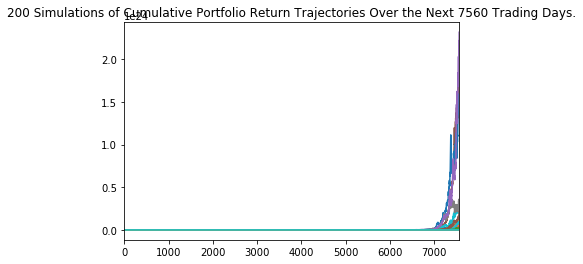

In [62]:
# Plot simulation outcomes
line_plot = MC_thirty_weights_2.plot_simulation()